In [1]:
# Importar las librerías necesarias
import pandas as pd

In [2]:
# Cargar el dataset
datos = pd.read_csv('datos.csv')

datos

,AF365,AF450,35 deg,42 deg,Grupo
0,2.320158,1.229614,13.01,19.39,0
1,1.529274,0.616514,8.18,24.78,0
2,1.908257,0.955847,7.75,16.90,0
3,1.590625,1.018495,4.10,16.30,0
4,1.617071,1.242961,5.76,21.05,0
...,...,...,...,...,...
119,4.093525,3.037288,3.97,5.35,2
120,4.730000,3.040000,7.04,14.44,2
121,4.010000,4.110000,6.65,17.37,2
122,3.200000,2.360000,6.70,10.57,2


In [3]:
# Contar el número de instancias de cada grupo

datos['Grupo'].value_counts()

1    62
0    48
2    14
Name: Grupo, dtype: int64

---

## Separar datos

In [4]:
# Se separa la variable a predecir (Grupo)
X = datos.drop('Grupo', axis=1)
y = datos['Grupo']

In [5]:
# Importar librería de scikit-learn para separar los datos
from sklearn.model_selection import train_test_split

# Separar datos en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1234)

# Al tratarse de un dataset desbalanceado, se hace una separación estratificada con stratify
# Así se asegura que la distribución de cada grupo será igual en los dos conjuntos

In [6]:
# Visualizar datos separados
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (99, 4)
Training Labels Shape: (99,)
Testing Features Shape: (25, 4)
Testing Labels Shape: (25,)


In [7]:
X_train

,AF365,AF450,35 deg,42 deg
43,1.964789,1.321641,12.81,20.09
60,3.120000,1.630000,7.00,11.09
4,1.617071,1.242961,5.76,21.05
74,2.180147,1.489262,5.69,8.41
57,2.350000,1.750000,6.77,10.65
...,...,...,...,...
14,2.360190,2.417640,9.17,15.97
58,2.360000,1.400000,6.27,10.41
20,1.200820,0.671578,8.17,17.66
118,3.034884,2.051768,4.55,8.50


In [8]:
y_train

43     0
60     1
4      0
74     1
57     1
      ..
14     0
58     1
20     0
118    2
0      0
Name: Grupo, Length: 99, dtype: int64

In [9]:
X_test

,AF365,AF450,35 deg,42 deg
56,2.710000,2.610000,12.63,15.48
85,2.740964,1.831435,6.10,10.71
39,2.262295,1.052067,6.58,20.41
26,1.971609,0.876543,5.84,15.02
93,1.973585,1.543846,7.64,14.59
92,2.745763,2.050569,8.46,14.77
30,2.225962,1.726468,9.00,18.72
12,0.410494,0.270591,3.91,16.32
47,2.148500,1.125300,10.21,20.22
79,1.948529,1.697131,5.06,14.76


In [10]:
y_test

56     1
85     1
39     0
26     0
93     1
92     1
30     0
12     0
47     0
79     1
19     0
115    2
24     0
122    2
89     1
68     1
64     1
23     0
15     0
119    2
38     0
54     1
73     1
109    1
105    1
Name: Grupo, dtype: int64

---

### Visualizar distribución de cada conjunto (entrenamiento y test)

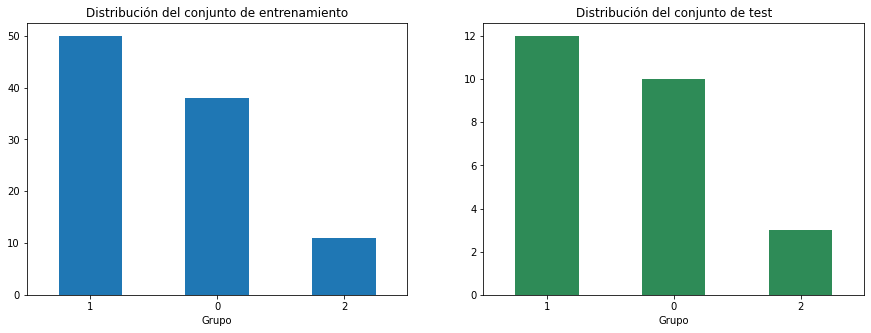

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))

#fig.suptitle("Distribución de los grupos en los conjuntos de entrenamiento y test")

# Representación del conjunto de entrenamiento
plt.subplot(121)
y_train.value_counts().plot(kind='bar')
plt.title('Distribución del conjunto de entrenamiento')
plt.xlabel('Grupo')
plt.xticks(rotation=0)

# Representación del conjunto de test
plt.subplot(122)
y_test.value_counts().plot(kind='bar', color='seagreen')
plt.title('Distribución del conjunto de test')
plt.xlabel('Grupo')
plt.xticks(rotation=0)

plt.show()

In [12]:
# Distribución de los grupos en el conjunto de entrenamiento
y_train.value_counts()

1    50
0    38
2    11
Name: Grupo, dtype: int64

In [13]:
# Valores normalizados
y_train.value_counts(normalize=True)

1    0.505051
0    0.383838
2    0.111111
Name: Grupo, dtype: float64

In [14]:
# Distribución de los grupos en el conjunto de test
y_test.value_counts()

1    12
0    10
2     3
Name: Grupo, dtype: int64

In [15]:
#Valores normalizados
y_test.value_counts(normalize=True)

1    0.48
0    0.40
2    0.12
Name: Grupo, dtype: float64

---

**Las clases (grupos) en los dos conjuntos tienen una proporción similar.**

---